In [41]:
#DO NOT RUN
#rename all files dirt or clean
import os
  

  
 

C:\junk\EDMBeam\EDM_Beam_Offset\TestImages\Dirt


In [5]:
import os
#remove all whitespace
os.chdir =  "C:/EDM_Beam_Offset/Training_set/Dirt"
myDir =  "C:/EDM_Beam_Offset/Training_set/Dirt"
#myDir =  "C:/EDM_Beam_Offset/Training_set/Clean"
print(os.getcwd())

for file in os.listdir(myDir):
    #print(file)
    if (myDir +'/' +file) != (myDir +'/' +"desktop.ini"):
        f = file.replace(' ','')
        os.rename(myDir +'/' +file,myDir +'/' +f)


C:\python\pytutorial


2560 1920


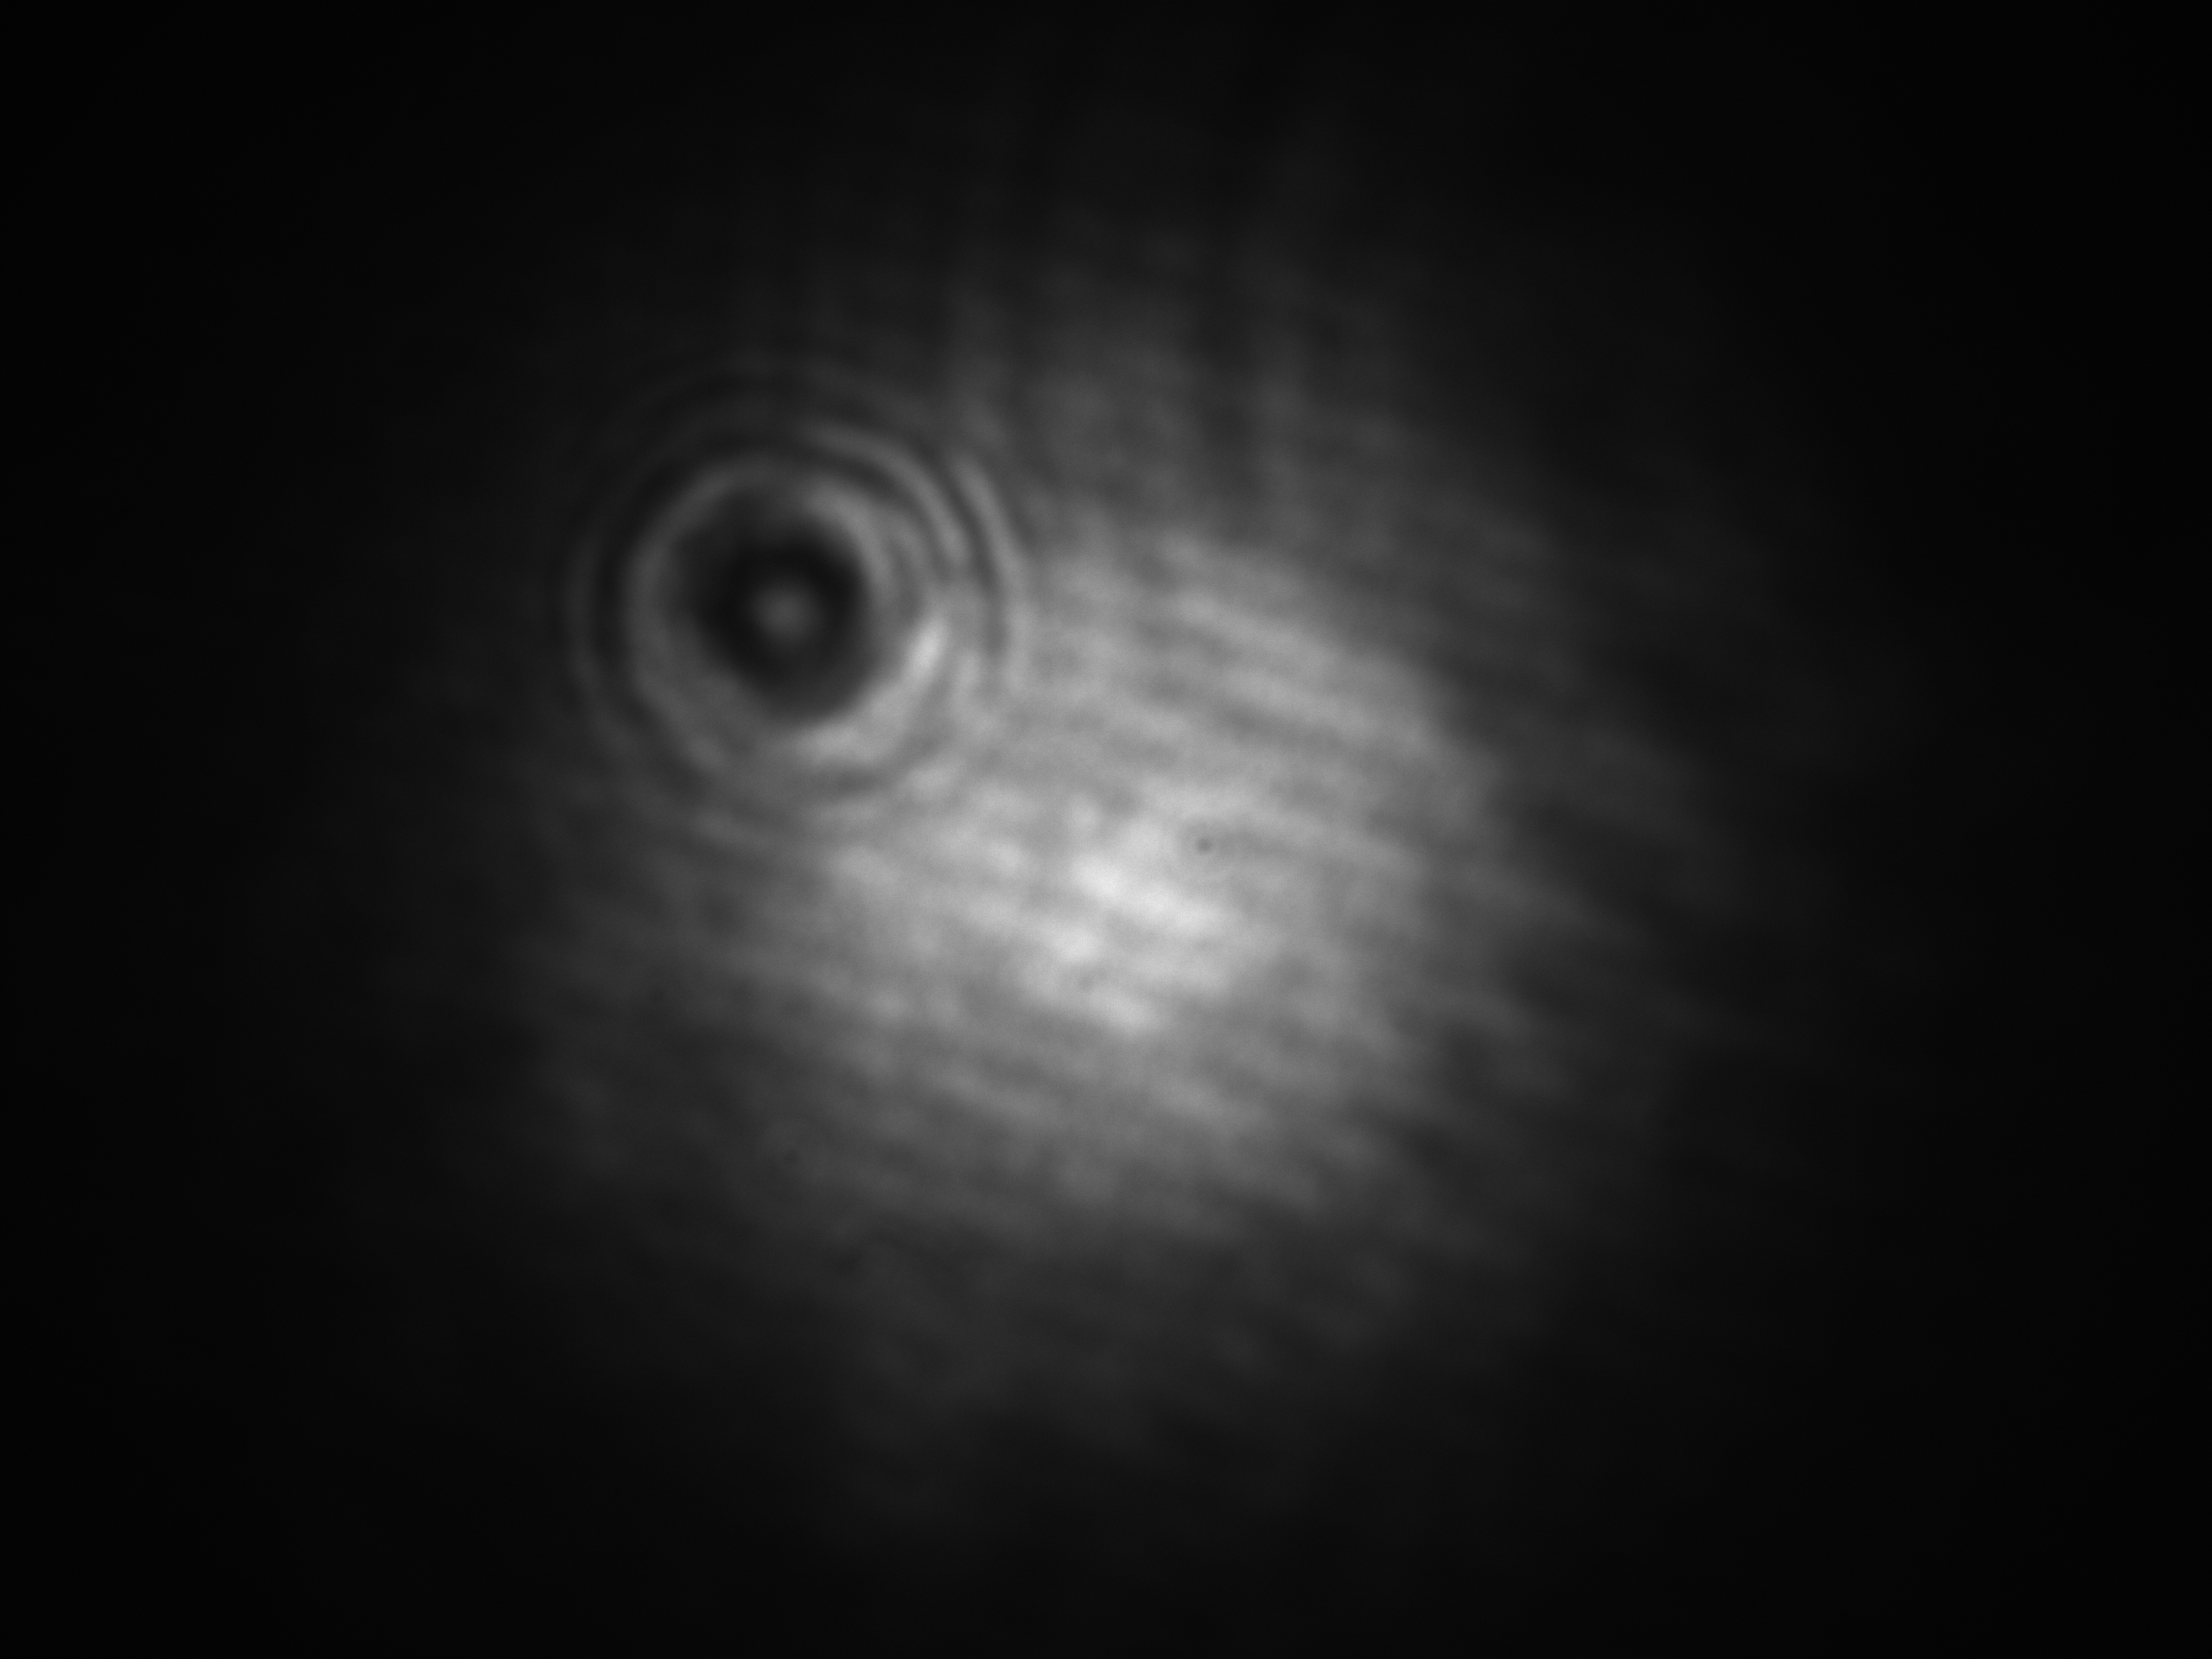

In [2]:
#DO NOT RUN
#This is just testing on single image
from PIL import ImageTk, Image
from PIL import Image               # to load images
from IPython.display import display # to display images



#Crop images
#image = Image.open("C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/dirt.58002032 00589 2019-07-08.png")
image = Image.open("C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/dirt.png")

width, height = image.size
print(width, height)
display(image)

1536 1536
C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt dirt.png
224 224


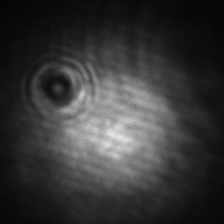

In [10]:
#DO NOT RUN
import os
#import cv2

def path_filename(path):
    head, tail = os.path.split(path)
    return head,tail 

file = "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/dirt.png"
image = Image.open(file)# Setting the points for cropped image
f_name, f_ext = path_filename(file)
left = 512
top = 102
right = 2048
bottom = 1638
  
# Cropped image of above dimension
# (It will not change orginal image)
image = image.crop((left, top, right, bottom))
width, height = image.size
print(width, height)
print(f_name , f_ext)
small_image = image.resize((224, 224)) 
s_width, s_height = small_image.size
print(s_width, s_height)
image = small_image.save("C:/EDM_Beam_Offset/Training_set/Dirt/" + f_ext)
display(small_image)

In [ ]:
#DO NOT RUN
import os

os.chdir =  "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Clean/"
dir = "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Clean/"
print(os.getcwd())
file = "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/dirt.png"
image = Image.open(file)
print(file)
#for file in os.listdir(dir):
#    print( file)

In [45]:
#DO NOT RUN, cropping and resizing images
import os
#import cv2
def path_filename(path):
    head, tail = os.path.split(path)
    return head,tail


#os.chdir =  "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/"
#myDir =  "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt"
#os.chdir = "C:/EDM_Beam_Offset/Test_set/Raw/Clean"
#myDir = "C:/EDM_Beam_Offset/Test_set/Raw/Clean"
os.chdir = "C:/EDM_Beam_Offset/Test_set/Clean"
myDir = "C:/EDM_Beam_Offset/Test_set/Clean"
#file = "C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/dirt.png"


for file in os.listdir(myDir):
    f_name, f_ext = path_filename(file)
    if (file.lower().endswith('png')):
        image = Image.open(myDir +'/' +file) # Setting the points for cropped image
        
        small_image = image.resize((224, 224)) 
        image = small_image.save("C:/EDM_Beam_Offset/Test_set_small/CleanSmall/" + f_ext)
        #display(image)

In [25]:
#Resize Training_set
os.chdir = "C:/EDM_Beam_Offset/Training_set/Dirt"
for file in os.listdir(myDir):
    #print(file)
    if (myDir +'/' +file) != (myDir +'/' +"desktop.ini"):
        image = Image.open(myDir +'/' +file) # Setting the points for cropped image
        f_name, f_ext = path_filename(file)
        left = 512
        top = 102
        right = 2048
        bottom = 1638
    # Cropped image of above dimension
    # (It will not change orginal image)
        image = image.crop((left, top, right, bottom))
        width, height = image.size
    #print(width, height)
    #print(f_name , f_ext)
        small_image = image.resize((224, 224)) 
        s_width, s_height = small_image.size
    #print(s_width, s_height)
        image = small_image.save("C:/EDM_Beam_Offset/Test_set/Dirty/" + f_ext)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/EDM_Beam_Offset/Test_set/Dirty/clean.58002032002262020-04-24.png'

In [57]:
#Start here

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision

data_dir = 'C:/EDM_Beam_Offset/'
#data_dir = 'C:/junk/CatsandDogs/training_set'

train_transform =transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.5], [0.5]),
                                     transforms.Grayscale(num_output_channels=1),
                                    ])

test_transform =transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize([0.5], [0.5]),
                                    transforms.Grayscale(num_output_channels=1),
                                   ])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/training_set_small', transform=train_transform)
test_data = datasets.ImageFolder(data_dir + '/Test_set_small', transform=test_transform)



batch_size = 8
num_workers=0
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8, num_workers=num_workers, shuffle=True)
classes = ['clean','dirty']
print('There are %d of spots for training' % len(train_data))
print('There are %d of spots for testing' % len(test_data))

There are 284 of spots for training
There are 56 of spots for testing


Min: -0.953, Max: 0.663


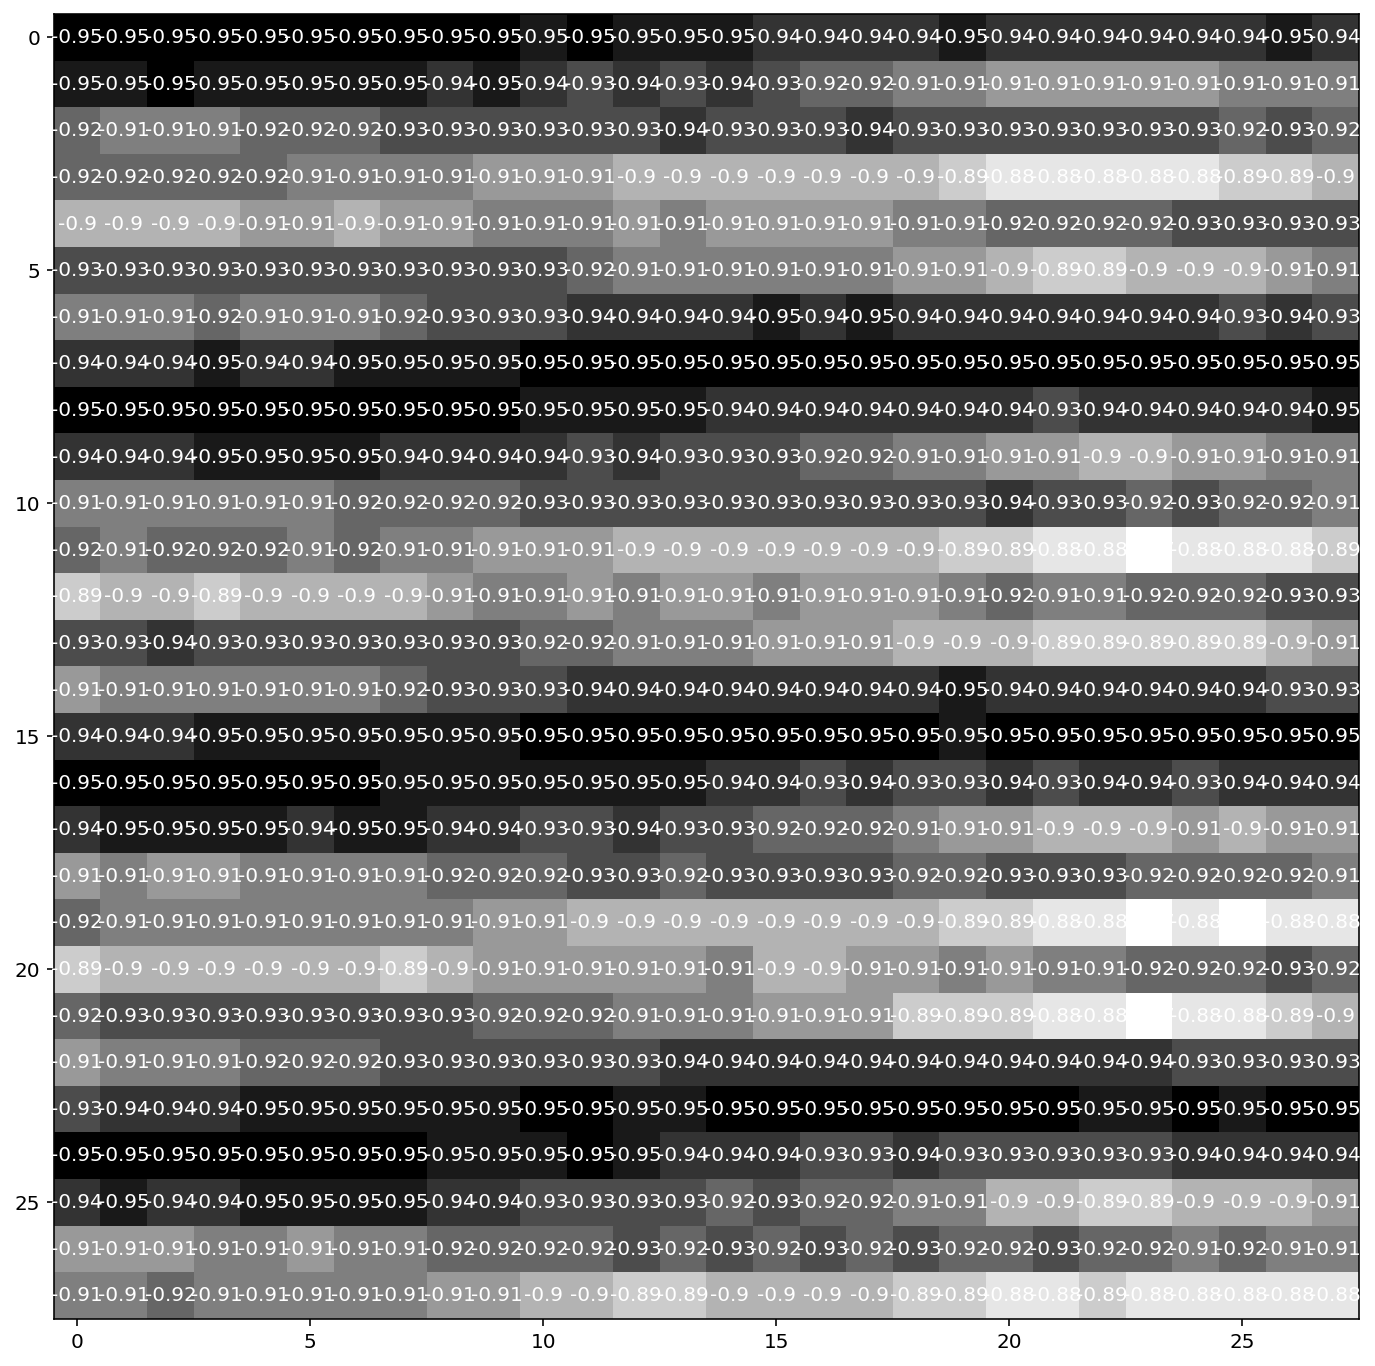

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
    
img = np.squeeze(images[1])

image = images[0]

print('Min: %.3f, Max: %.3f' % (image.min(), image.max()))
even_smaller_image =np.resize(image, [28,28])     
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(even_smaller_image, cmap='gray')
width, height = even_smaller_image.shape
thresh = even_smaller_image.max()/2.5
for x in range(width//1):
    for y in range(height//1):
        val = round(even_smaller_image[x][y],2) if even_smaller_image[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if even_smaller_image[x][y]<thresh else 'black')

torch.Size([8, 1, 224, 224])


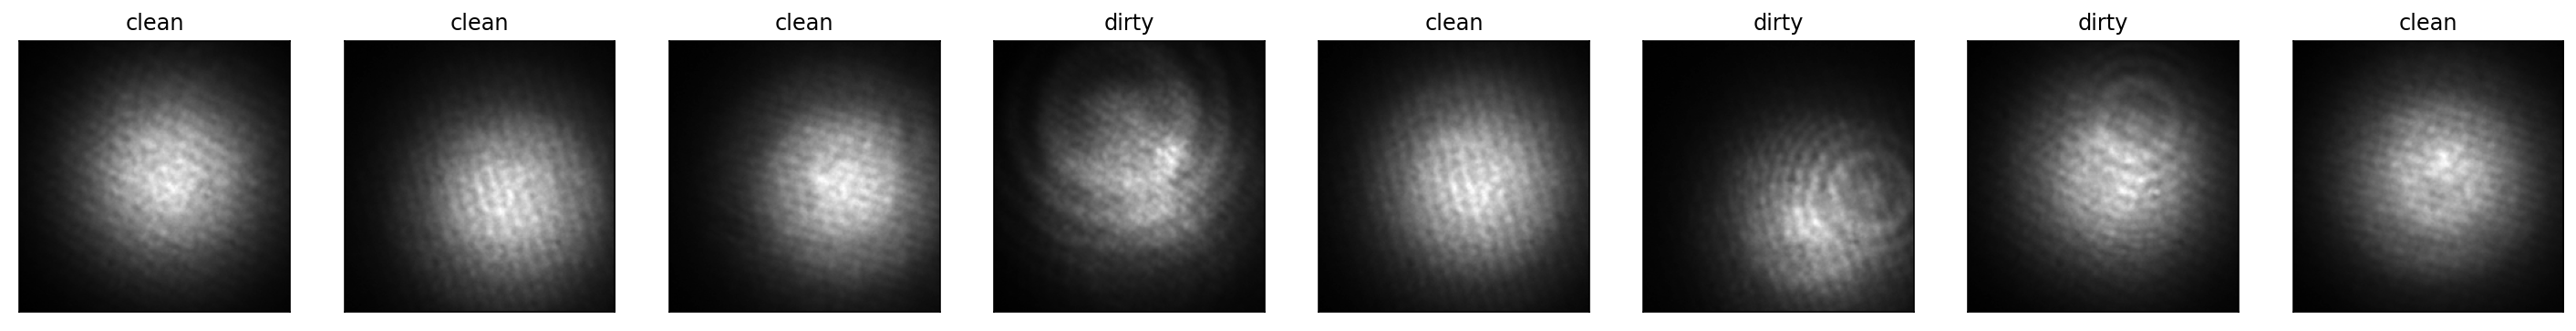

In [68]:
import numpy as np
from PIL import ImageTk, Image
def img_show(inp, title=None):    
    inp = inp.numpy().transpose((1, 2, 0))    
    inp = np.clip(inp, 0, 1)    
    plt.figure(figsize=(16,4))
    plt.axis('off')
    plt.imshow(inp)
    
    if title is not None:
        plt.title(title)
# Visualize some sample data
# define dataloader parameters
#batch_size = 8
#num_workers=0

# prepare data loaders

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(next(iter(train_loader))[0].shape)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(8):
    ax = fig.add_subplot(1, 8, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx]), cmap='gray')   #, (1, 2, 0)
    ax.set_title(classes[labels[idx]])
#image = Image.open("C:/junk/EDMBeam/EDM_Beam_Offset/TrainingImages/Dirt/dirt.png")
#image = Image.open("C:/EDM_Beam_Offset/Training_set/Dirt/dirt.png")
#display(images[00])

torch.Size([8, 1, 224, 224])


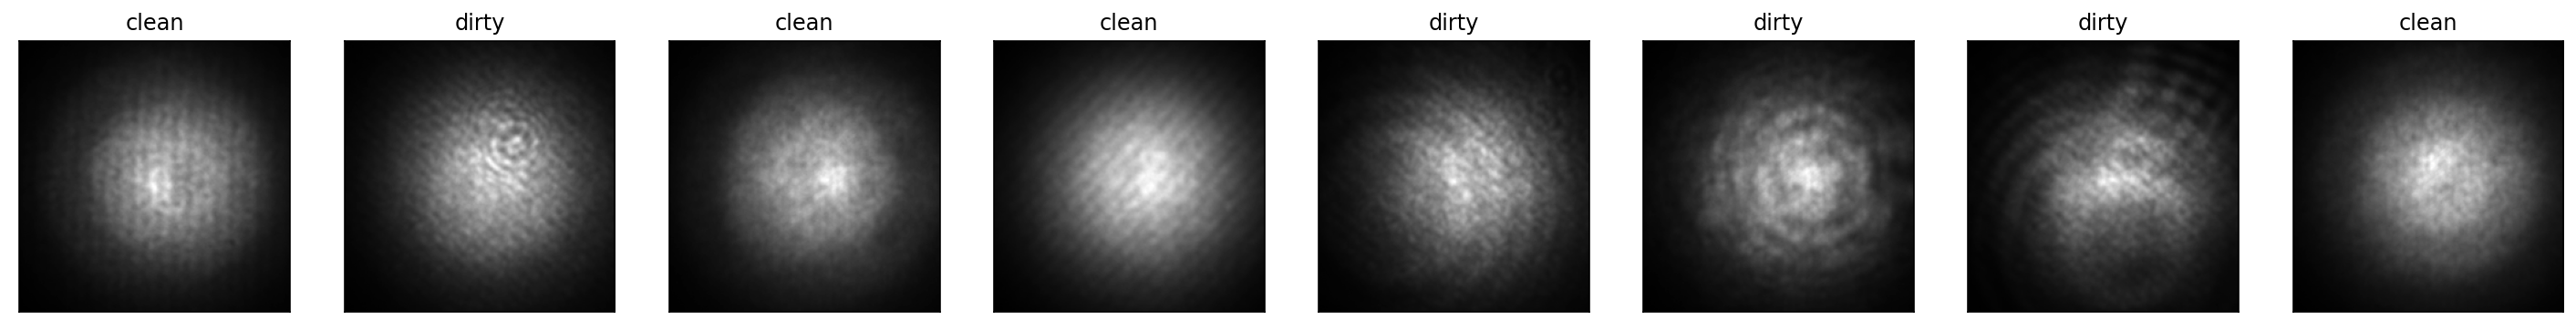

In [69]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
print(next(iter(train_loader))[0].shape)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(8):
    ax = fig.add_subplot(1, 8, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx]), cmap='gray')   #, (1, 2, 0)
    ax.set_title(classes[labels[idx]])

In [60]:
#Define network architecture
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 16384  # 4 fold
        hidden_2 = 4096  # 4 fold
        hidden_3 = 512
        # linear layer (50176 -> hidden_1)
        self.fc1 = nn.Linear(224 * 224, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        self.fc3 = nn.Linear(hidden_2, hidden_3)
        # linear layer (n_hidden -> 2)
        self.fc4 = nn.Linear(hidden_2, 2)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 224 * 224)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc4(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=50176, out_features=16384, bias=True)
  (fc2): Linear(in_features=16384, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [73]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [74]:
# number of epochs to train the model
n_epochs = 50

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # model by default is set to train
    for (data, target) in (train_loader):
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss 
        train_loss += loss.item()*batch_size
        
         
        print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / batch_size))
        train_loss = 0.0

Epoch 1, Batch 36 loss: 322.4306640625000000
Epoch 1, Batch 36 loss: 71.5218887329101562
Epoch 1, Batch 36 loss: 47.1478309631347656
Epoch 1, Batch 36 loss: 3.5770747661590576
Epoch 1, Batch 36 loss: 0.6600868701934814
Epoch 1, Batch 36 loss: 6.7839317321777344
Epoch 1, Batch 36 loss: 18.5059452056884766
Epoch 1, Batch 36 loss: 36.9985733032226562
Epoch 1, Batch 36 loss: 15.2524795532226562
Epoch 1, Batch 36 loss: 35.4184684753417969
Epoch 1, Batch 36 loss: 2.7732396125793457
Epoch 1, Batch 36 loss: 33.9936065673828125
Epoch 1, Batch 36 loss: 1.5115517377853394
Epoch 1, Batch 36 loss: 11.6757745742797852
Epoch 1, Batch 36 loss: 2.4759335517883301
Epoch 1, Batch 36 loss: 32.6716003417968750
Epoch 1, Batch 36 loss: 28.9886302947998047
Epoch 1, Batch 36 loss: 10.8203783035278320
Epoch 1, Batch 36 loss: 4.6917409896850586
Epoch 1, Batch 36 loss: 20.9691371917724609
Epoch 1, Batch 36 loss: 1.7131890058517456
Epoch 1, Batch 36 loss: 13.5680665969848633
Epoch 1, Batch 36 loss: 2.3495388031005

In [66]:
# Test the trained network

# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for training

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.693050

Test Accuracy of     0:  5% ( 2/34)
Test Accuracy of     1: 68% (15/22)

Test Accuracy (Overall): 30% (17/56)


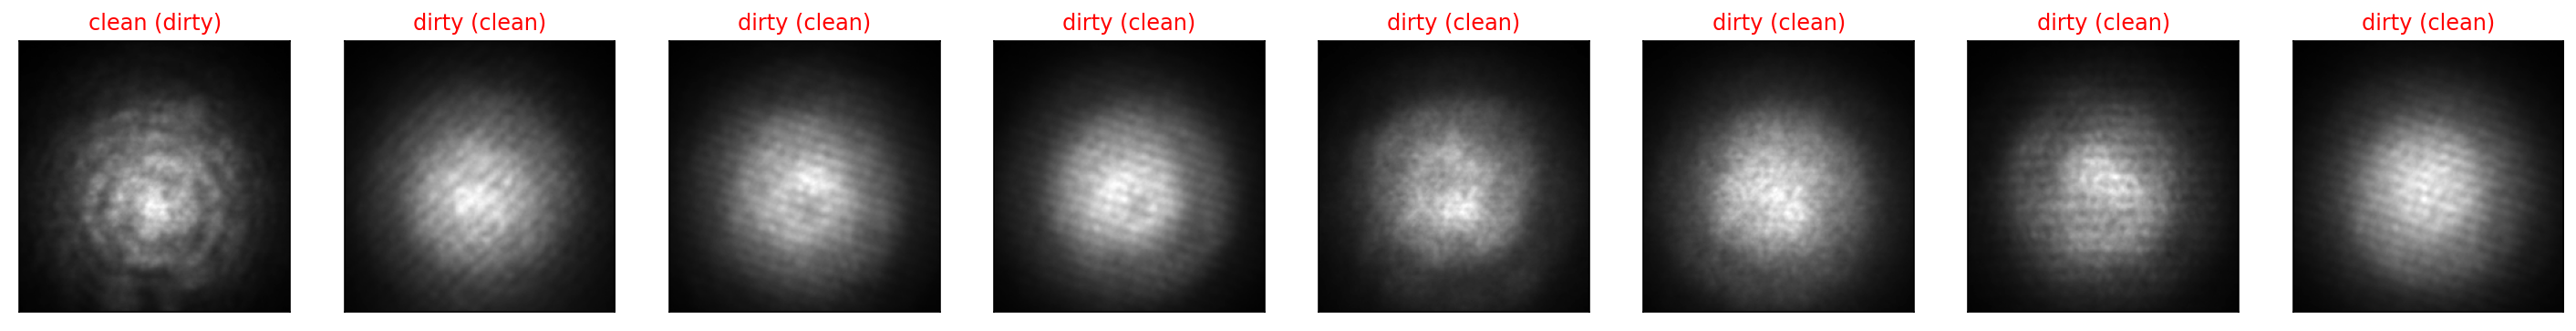

In [67]:
#Visualize Sample Test Results
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(8):
    ax = fig.add_subplot(1, 8, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]],classes[labels[idx]]),
                 color = ("green" if preds[idx]==labels[idx] else "red"))
    



ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

TypeError: 'ImageFolder' object is not callable

300 280


C:\junk\EDMBeam\EDM_Beam_Offset\TrainingImages\Clean


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Pictures\\network.png'

Package                            Version
---------------------------------- ----------
alabaster                          0.7.12
altair                             4.0.1
altgraph                           0.16.1
anaconda-client                    1.7.2
anaconda-navigator                 1.9.6
anaconda-project                   0.8.2
appdirs                            1.4.4
asn1crypto                         0.24.0
astroid                            2.1.0
astropy                            3.1
atomicwrites                       1.2.1
attrs                              18.2.0
autopep8                           1.5.6
Babel                              2.6.0
backcall                           0.1.0
backports.os                       0.1.1
backports.shutil-get-terminal-size 1.0.0
beautifulsoup4                     4.6.3
bitarray                           0.8.3
bkcharts                           0.2
black                              20.8b1
blaze                              0.11.3
bleach 

You should consider upgrading via the 'c:\users\tmyrtve\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.
